In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
data = pd.read_csv("Joey\Record_Data\Y024\T0000.csv")
pprint(data.columns)
data

Index(['Unnamed: 0', 'Time', 'T1', 'T2', 't1', 't2', 'q1', 'q2', 'x', 'y',
       'x_dot', 'y_dot', 'Fx', 'Fy', 'Fx_Mea', 'Fy_Mea'],
      dtype='object')


,Unnamed: 0,Time,T1,T2,t1,t2,q1,q2,x,y,x_dot,y_dot,Fx,Fy,Fx_Mea,Fy_Mea
0,0,0.000000,0.0,0.0,-0.997253,-1.013736,0.102,0.132,0.265914,0.241983,0.000000,0.000000,-0.0,0.0,-4.105476,5.002797
1,1,0.051459,0.0,0.0,-1.063187,-1.013736,0.111,0.132,0.268375,0.241720,0.047824,-0.005113,-0.0,0.0,-1.290399,4.371375
2,2,0.067143,0.0,0.0,0.074176,0.024725,0.125,0.139,0.271971,0.239602,0.229296,-0.135033,-0.0,0.0,-2.134800,4.794876
3,3,0.082615,0.0,0.0,-0.074176,0.057692,0.125,0.139,0.271971,0.239602,0.000000,0.000000,-0.0,0.0,-1.371597,4.682217
4,4,0.096127,0.0,0.0,0.008242,-0.008242,0.125,0.139,0.271971,0.239602,0.000000,0.000000,-0.0,0.0,-0.427401,4.518959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,1273,19.917357,0.0,0.0,-0.008242,0.008242,0.227,0.122,0.300106,0.238738,0.000000,0.000000,-0.0,0.0,-3.725434,4.701900
1274,1274,19.931679,0.0,0.0,0.008242,0.008242,0.227,0.122,0.300106,0.238738,0.000000,0.000000,-0.0,0.0,-4.217052,4.784118
1275,1275,19.946317,0.0,0.0,0.008242,-0.024725,0.226,0.122,0.299838,0.238799,-0.018307,0.004219,-0.0,0.0,-2.974159,4.573802
1276,1276,19.962213,0.0,0.0,-0.107143,0.024725,0.224,0.122,0.299302,0.238922,-0.033728,0.007719,-0.0,0.0,-4.896009,4.775644


In [4]:
data = data[["Time", "x", "q1", "q2", "x_dot"]]
data["x_dot"]

0       0.000000
1       0.047824
2       0.229296
3       0.000000
4       0.000000
          ...   
1273    0.000000
1274    0.000000
1275   -0.018307
1276   -0.033728
1277    0.000000
Name: x_dot, Length: 1278, dtype: float64

In [5]:
sign_change_index = []
current_sign = np.sign(data.iloc[0]["x_dot"])
for index, row in data.iterrows():
    if np.sign(row["x_dot"]) != current_sign: 
        sign_change_index.append(index)
        current_sign = np.sign(row["x_dot"])
        # pprint(row)


In [6]:
data["x_dot"].describe()

count    1278.000000
mean        0.000908
std         0.103749
min        -1.282203
25%        -0.017739
50%         0.000000
75%         0.020293
max         1.225168
Name: x_dot, dtype: float64

<AxesSubplot:ylabel='x_dot'>

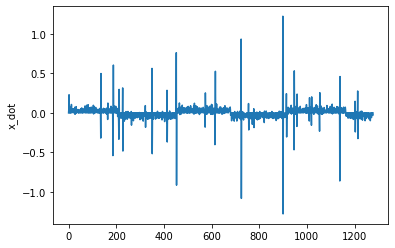

In [7]:
sns.lineplot(x=data.index, y=data["x_dot"])

C:\Users\andyb\AppData\Local\Temp\ipykernel_25168\802743023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["x_dot_abs"] = abs(data.x_dot)


<AxesSubplot:ylabel='x_dot_abs'>

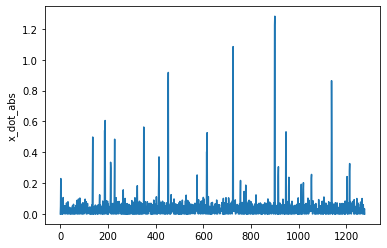

In [11]:
data["x_dot_abs"] = abs(data.x_dot)
sns.lineplot(x=data.index, y=data["x_dot_abs"])

<AxesSubplot:ylabel='x'>

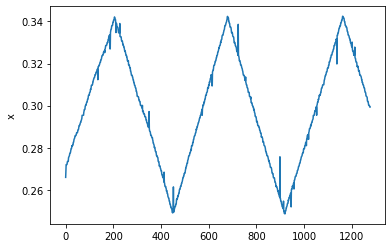

In [ ]:
sns.lineplot(x=data.index, y=data["x"])

average velocity:  -0.024395485168307963 	 m/s
average velocity:  -2.439548516830796 	 cm/s


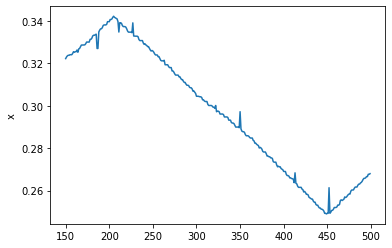

In [32]:
x= [i for i in range(150,500)]
y = data.iloc[x]["x"]
sns.lineplot(x=x, y=y)
distance = y.max()-y.min()
avg_vel = distance/(data.iloc[y.idxmax()]["Time"]-data.iloc[y.idxmin()]["Time"])
print("average velocity: ", avg_vel, "\t m/s")
print("average velocity: ", avg_vel*100, "\t cm/s")

3.2350869178771973